In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
camera = cv2.VideoCapture(0)
eyes_cascade        = cv2.CascadeClassifier('third-party/frontalEyes35x16.xml')
nose_cascade        = cv2.CascadeClassifier('third-party/Nose18x15.xml')
glasses             = cv2.imread('glasses.png', -1)
mustache            = cv2.imread('mustache.png',-1)

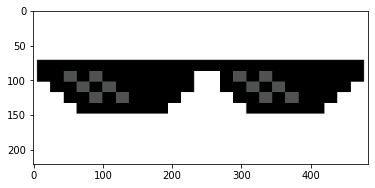

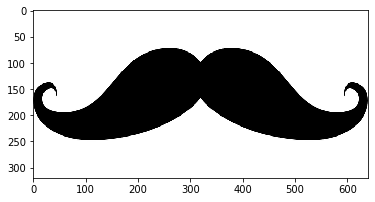

In [3]:
plt.imshow(glasses)
plt.show()
plt.imshow(mustache)
plt.show()

In [4]:
while True:
    ret,img = camera.read()
    
    if ret == False:
        continue
    
    eyes = eyes_cascade.detectMultiScale(img,1.1,5)
    noses = nose_cascade.detectMultiScale(img,1.1,5)
    
    for eye in eyes:
        x,y,w,h = eye
        specs = cv2.resize(glasses, (w,h))
        spec = cv2.cvtColor(specs,cv2.COLOR_BGRA2BGR)
        for i in range(0, h):
            for j in range(0, w):
                if specs[i, j][3] != 0:
                    img[y + i, x + j] = spec[i, j]
                    
    for nose in noses:
        x,y,w,h = nose
        mush = cv2.resize(mustache, (w,h))
        mus = cv2.cvtColor(mush,cv2.COLOR_BGRA2BGR)
        for i in range(0, h):
            for j in range(0, w):
                if mush[i, j][3] != 0:
                    img[y + i, x + j] = mus[i, j]
                    
    cv2.imshow("filter",img)
    key = cv2.waitKey(1) & 0xFF
    if key==ord('q'):
        break

camera.release()
cv2.destroyAllWindows()
